# Mini Project 3

### Data Overview
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

[Estimation of Obesity Levels Based On Eating Habits and Physical Condition ](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition). (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

### Problem Statement
This analysis aims to assess obesity levels among individuals in Mexico, Peru, and Colombia based on their eating habits and physical conditions.
The goal is to identify correlations between these factors and obesity levels, develop predictive classification models, and provide insights to inform public health initiatives targeting obesity in these regions.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, f1_score


In [2]:
#load the dataset
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df["CAEC"].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [7]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [8]:
df["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [9]:
# Convert categorical variables using one-hot encoding
nominal_cols = [
    'Gender', 
    'family_history_with_overweight', 
    'FAVC', 
    'CAEC', 
    'SMOKE', 
    'SCC', 
    'CALC', 
    'MTRANS'
]

# One-hot encode nominal variables
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)



In [10]:
df_encoded

Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMOKE_yes  \
0     1.000000        Normal_Weight        False  ...    False      False   
1     0.000000        Normal_Weight        False  ...    False       True   
2     1.000000        Normal_Weight         True  ...    False      False   
3     0.000000   Overweight_Level_I         True  ...    False      False   
4     0.000000  Overweight_Level_II         True  ...    False      False   
...        ...                  ...          ...  ...      ...        ...   
2106  0.906247     Obesity_Type_III        False  ...    False      False   
2107  0.599270     Obesity_Type_III        False  ...    False      False   
2108  0.646288     Obesity_Type_III        False  ...    False      False   
2109  0.586035     Obesity_Type_III        False  ...    False      False   
2110  0.714137     Obesity_Type_III        False  ...    False      False   

      SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0       False            False           False     True        False   
1        True            False            True    False        False   
2       False             True           False    False        False   
3       False             True           False    False        False   
4       False            False            True    False        False   
...       ...              ...             ...      ...          ...   
2106    False            False            True    False        False   
2107    False            False            True    False        False   
2108    False            False            True    False        False   
2109    False            False            True    False        False   
2110    False            False            True    False        False   

      MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                False                          True           False  
1                False                          True           False  
2                False                          True           False  
3                False                         False            True  
4                False                          True           False  
...                ...                           ...             ...  
2106             False                          True           False  
2107             False                          True           False  
2108             False                          True           False  
2109             False                          True           False  
2110             False                          True           False  

[2111 rows x 24 columns]

In [11]:
# Encode the target variable
df_encoded['NObeyesdad'] = df_encoded['NObeyesdad'].astype('category').cat.codes

In [12]:
print(df_encoded['NObeyesdad'].head())


0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int8


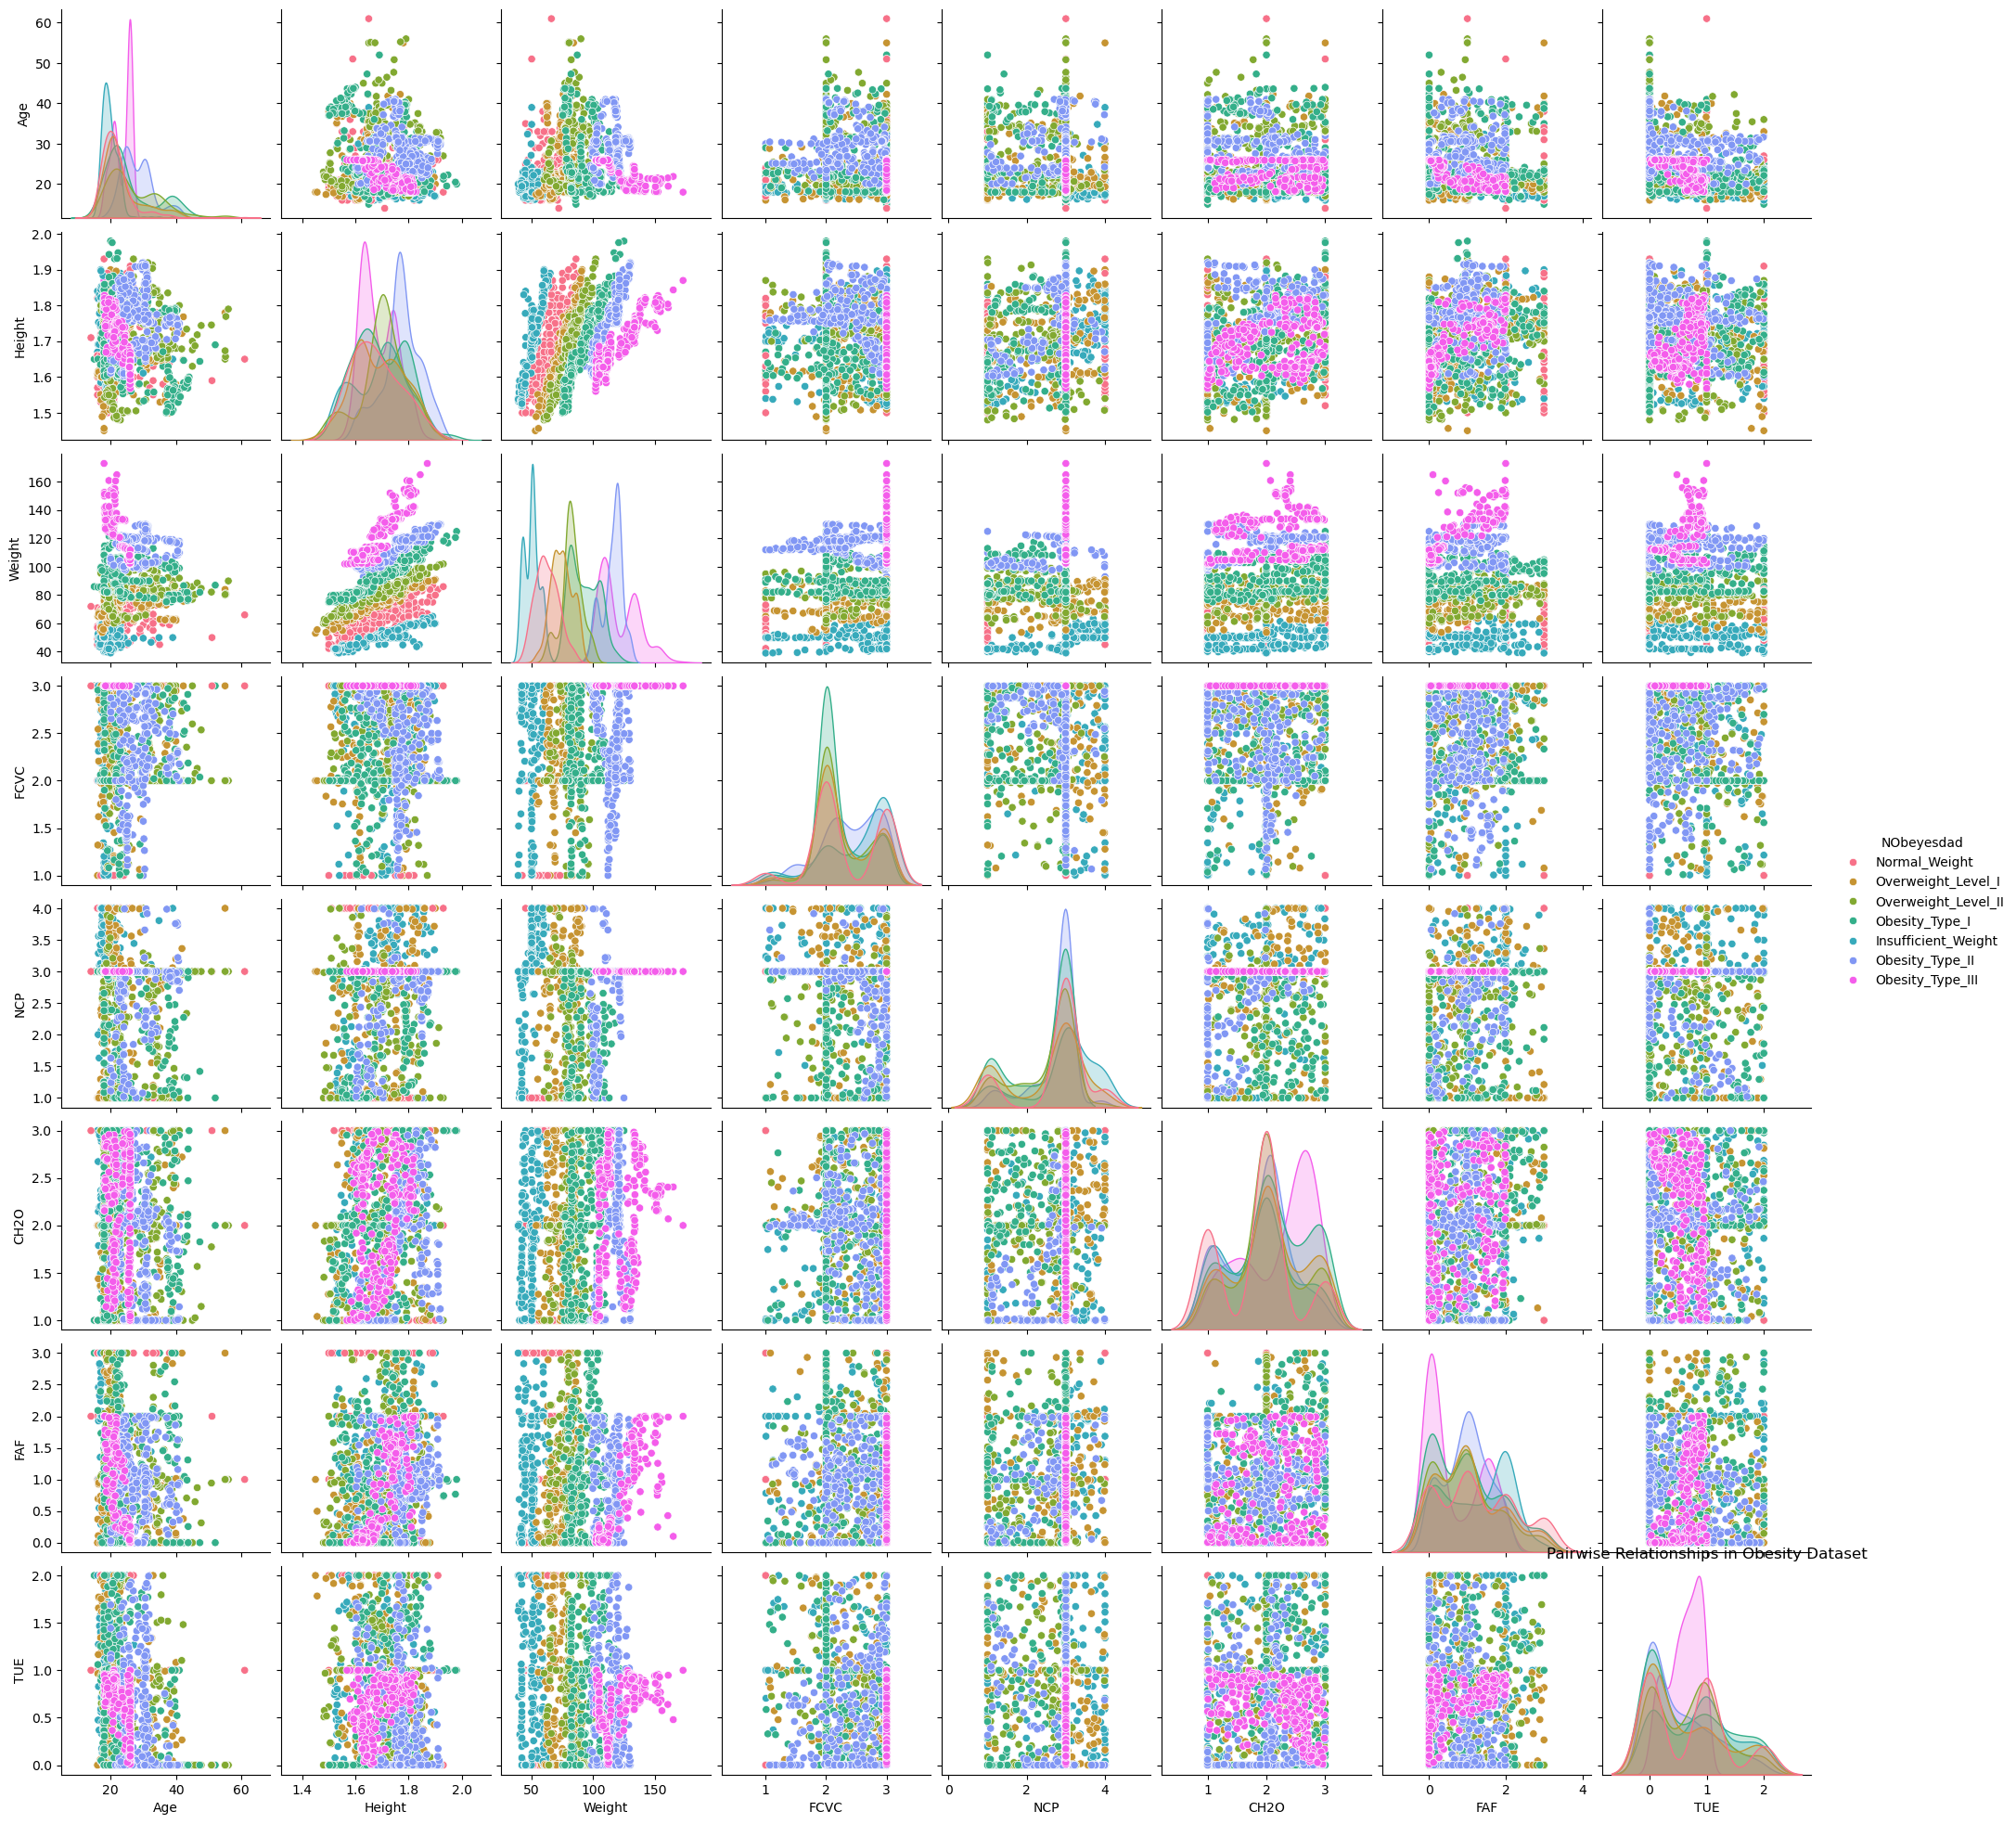

In [13]:
subset = df[['Age', 'Height', 'Weight', 'NObeyesdad','FCVC',	'NCP'	,'CH2O',	'FAF'	,'TUE'] + nominal_cols]
sns.pairplot(subset, hue='NObeyesdad', palette='husl')
plt.title('Pairwise Relationships in Obesity Dataset')
plt.show()

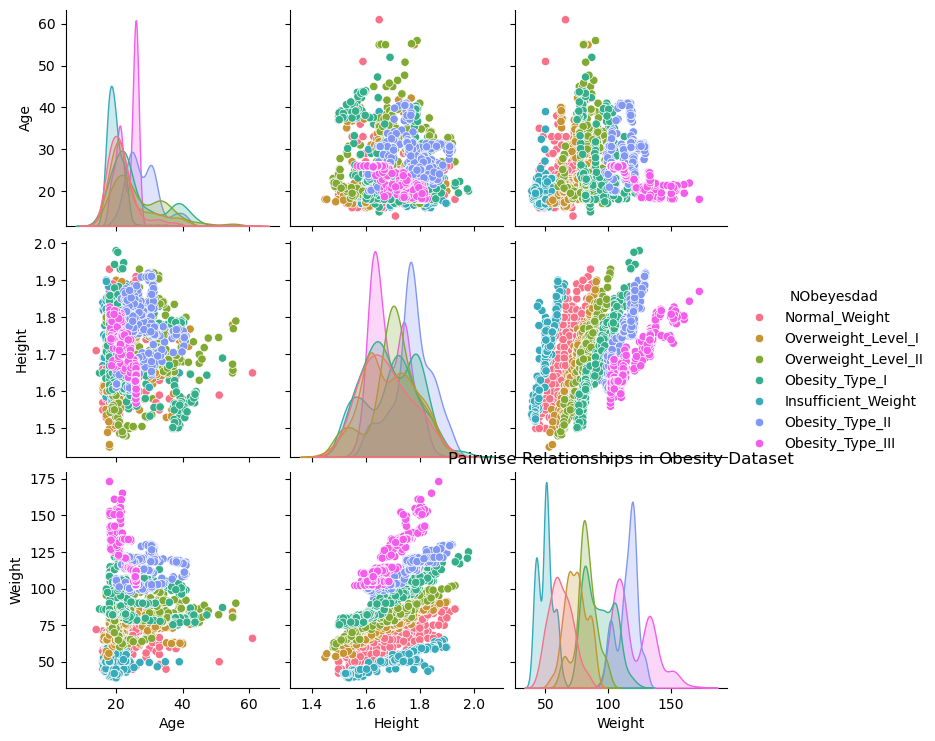

In [14]:
subset = df[['Age', 'Height', 'Weight', 'NObeyesdad'] + nominal_cols]

sns.pairplot(subset, hue='NObeyesdad', palette='husl')
plt.title('Pairwise Relationships in Obesity Dataset')
plt.show()

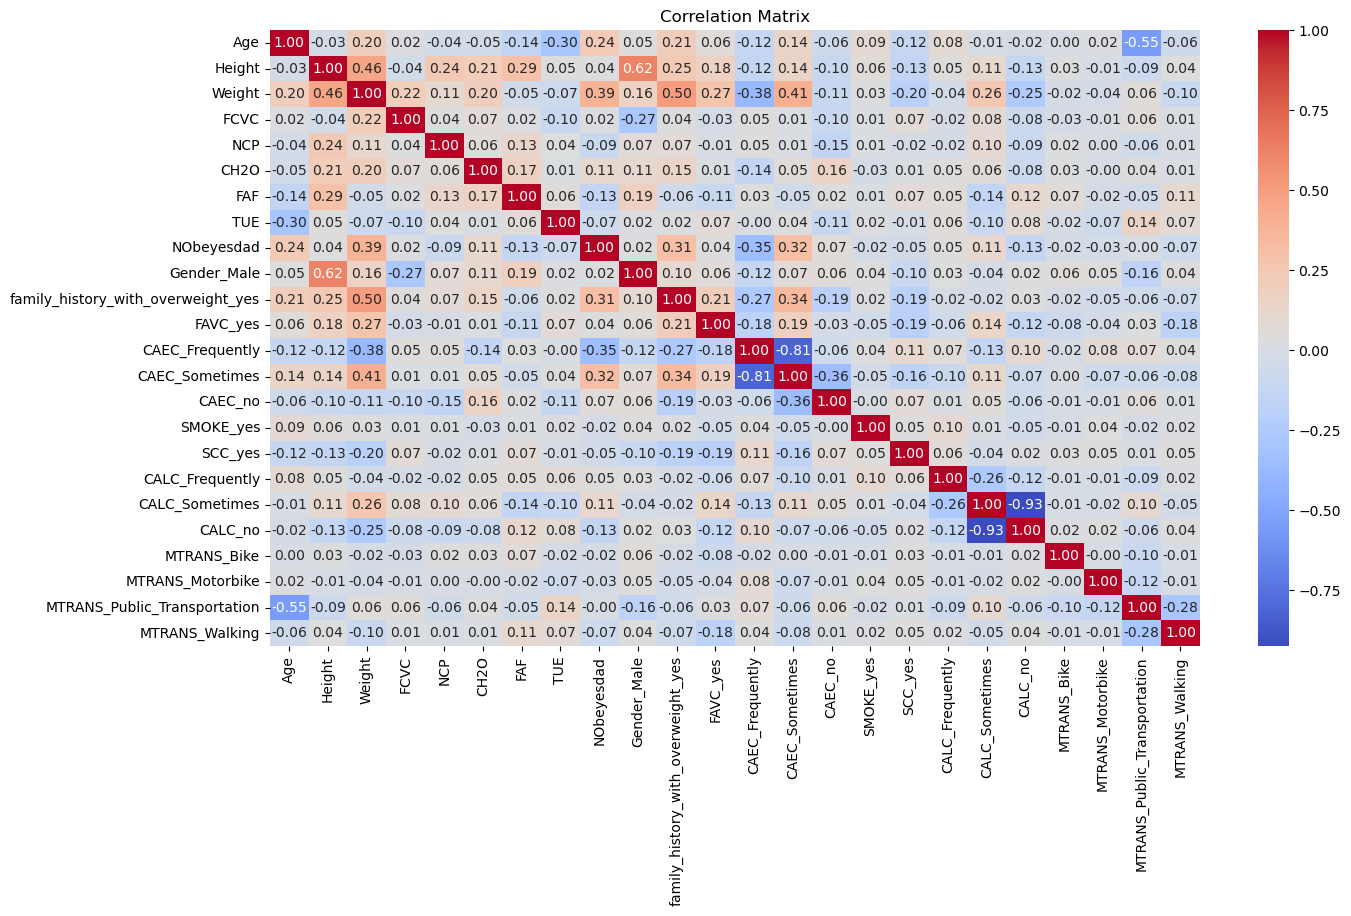

In [17]:
correlation = df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Define features and target variable
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1688, 23)
y_train shape: (1688,)
X_test shape: (423, 23)
y_test shape: (423,)


In [89]:
pca = PCA(n_components=0.97)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])

Original number of features: 23
Reduced number of features: 19


### Predictive modelling

In [90]:
rfc = RandomForestClassifier(random_state=42)
dtc= DecisionTreeClassifier(random_state=42)
logreg=LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [91]:
rfc.fit(X_train_pca, y_train)
logreg.fit(X_train_pca,y_train)
dtc.fit(X_train_pca, y_train)
gb.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
# Make predictions
dt_pred = dtc.predict(X_test_pca)
rf_pred = rfc.predict(X_test_pca)
lg_pred= logreg.predict(X_test_pca)
gb_pred=gb.predict(X_test_pca)



Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72        56
           1       0.54      0.44      0.48        62
           2       0.66      0.60      0.63        78
           3       0.84      0.90      0.87        58
           4       0.98      0.97      0.98        63
           5       0.53      0.59      0.56        56
           6       0.55      0.54      0.55        50

    accuracy                           0.69       423
   macro avg       0.68      0.69      0.68       423
weighted avg       0.69      0.69      0.68       423



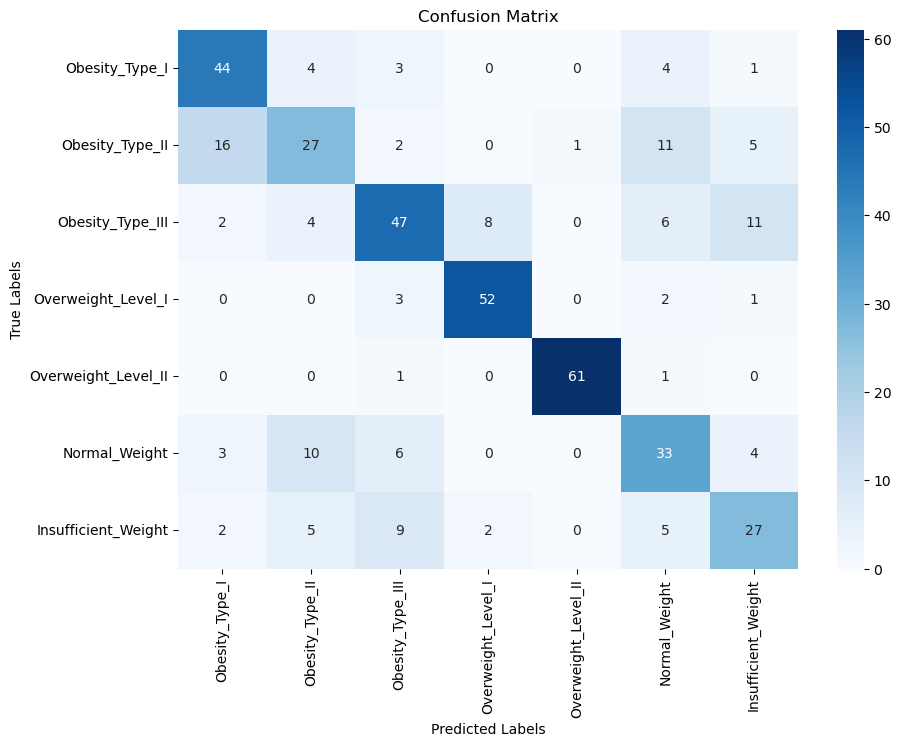

In [94]:
# Evaluation
print("Decision Tree Classifier Report:\n", classification_report(y_test, dt_pred))
cm=confusion_matrix(y_test, dt_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.61      0.60      0.60        62
           2       0.86      0.83      0.84        78
           3       0.92      0.97      0.94        58
           4       1.00      1.00      1.00        63
           5       0.76      0.73      0.75        56
           6       0.75      0.72      0.73        50

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.82       423
weighted avg       0.82      0.82      0.82       423



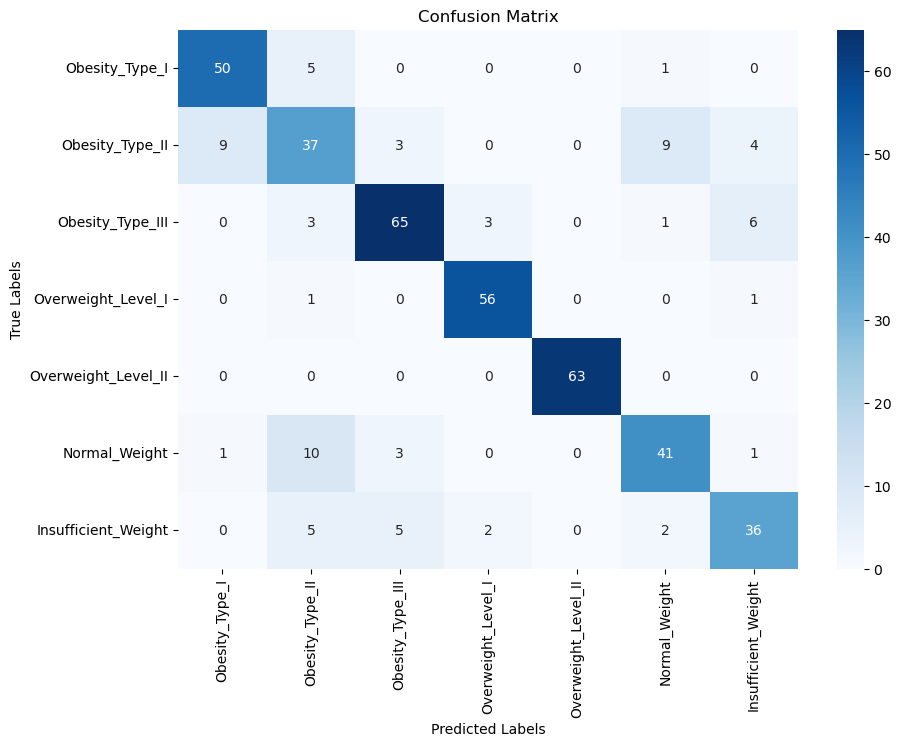

In [95]:
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_pred))
cm=confusion_matrix(y_test, rf_pred)
# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        56
           1       0.65      0.32      0.43        62
           2       0.77      0.65      0.71        78
           3       0.76      0.95      0.85        58
           4       1.00      1.00      1.00        63
           5       0.55      0.62      0.58        56
           6       0.56      0.58      0.57        50

    accuracy                           0.72       423
   macro avg       0.71      0.73      0.71       423
weighted avg       0.72      0.72      0.71       423



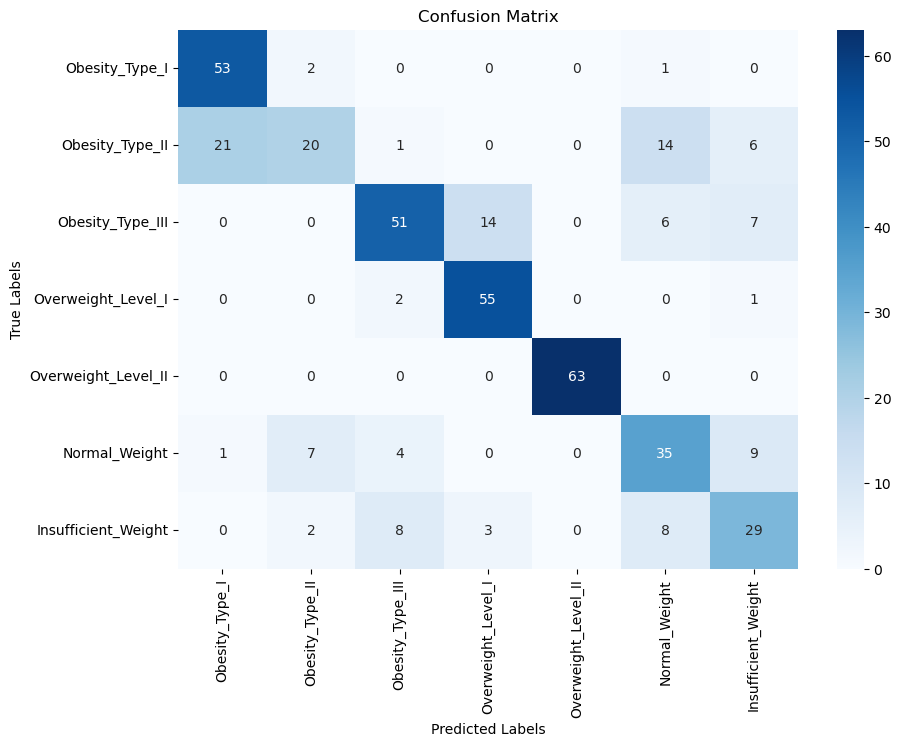

In [96]:
print("Logistic Regression Report:\n", classification_report(y_test, lg_pred))
cm=confusion_matrix(y_test, lg_pred)
# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        56
           1       0.70      0.60      0.64        62
           2       0.78      0.83      0.81        78
           3       0.95      0.91      0.93        58
           4       1.00      0.97      0.98        63
           5       0.64      0.68      0.66        56
           6       0.67      0.64      0.65        50

    accuracy                           0.79       423
   macro avg       0.79      0.79      0.79       423
weighted avg       0.79      0.79      0.79       423



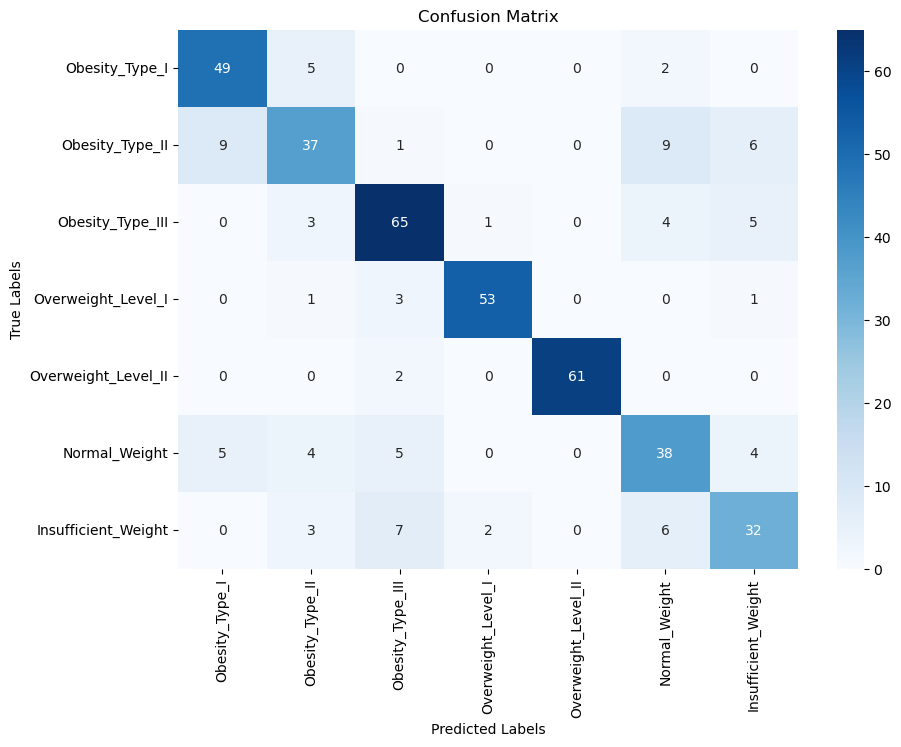

In [97]:
print("Gradient Boosting Report:\n", classification_report(y_test, gb_pred))
cm=confusion_matrix(y_test, gb_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [68]:
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

In [69]:
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        56
           1       0.65      0.56      0.60        62
           2       0.82      0.82      0.82        78
           3       0.90      0.91      0.91        58
           4       1.00      0.97      0.98        63
           5       0.68      0.70      0.69        56
           6       0.71      0.70      0.71        50

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



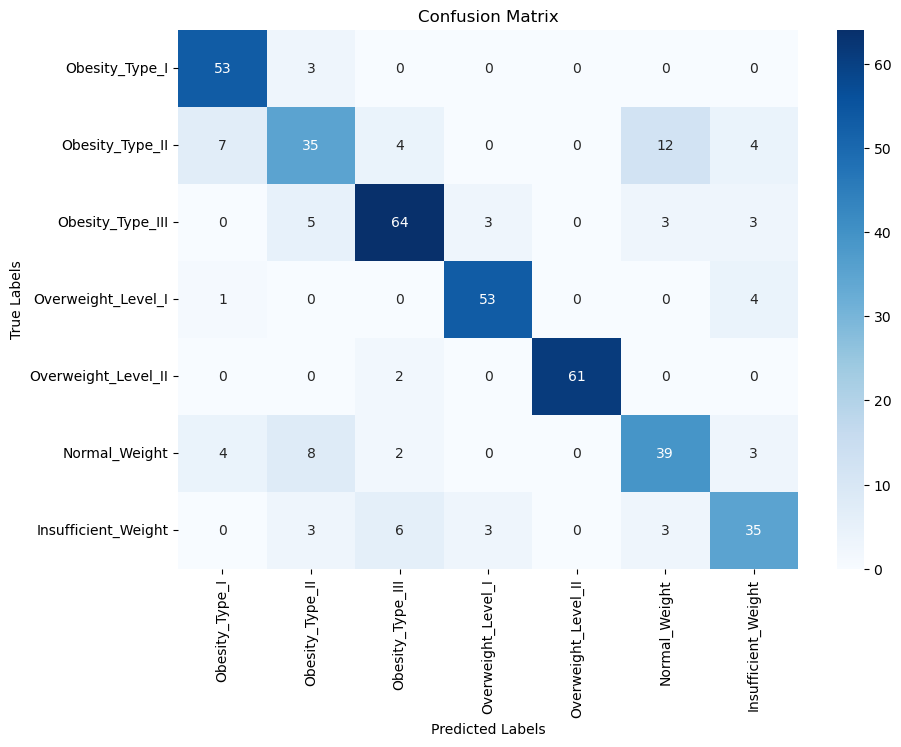

In [70]:
xgb_pred = xgb_model.predict(X_test_pca)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
cm=confusion_matrix(y_test, xgb_pred)


# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [71]:
rf_scores = rfc.predict_proba(X_test_pca)[:, 1]
dt_scores = dtc.predict_proba(X_test_pca)[:, 1]
gb_scores = gb.predict_proba(X_test_pca)[:, 1]

#### ROC Curve for RF Model

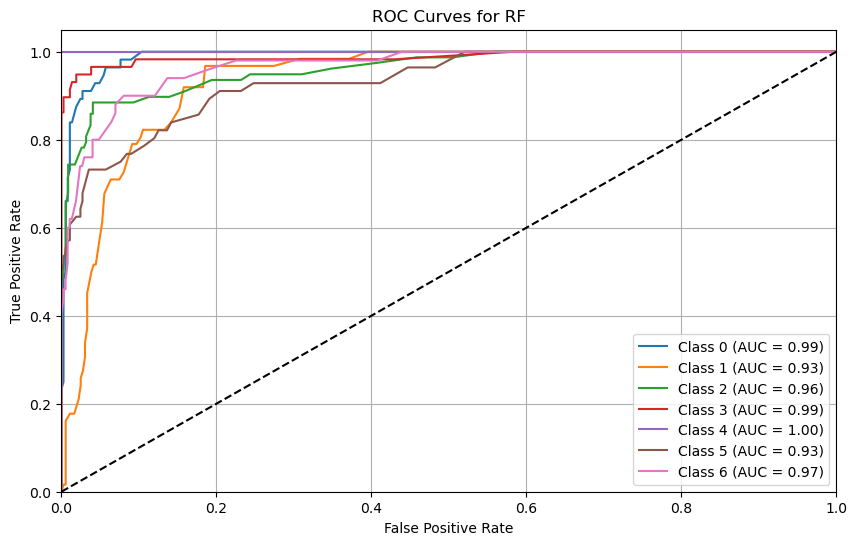

Micro Average AUC: 0.98
Macro Average AUC: 0.97


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for y_test
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_scores = rfc.predict_proba(X_test_pca)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for RF')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro Average ROC AUC
roc_auc_macro = np.mean([roc_auc_score(y_test_bin[:, i], y_scores[:, i]) for i in range(n_classes)])

print(f'Micro Average AUC: {roc_auc_micro:.2f}')
print(f'Macro Average AUC: {roc_auc_macro:.2f}')

#### For DT

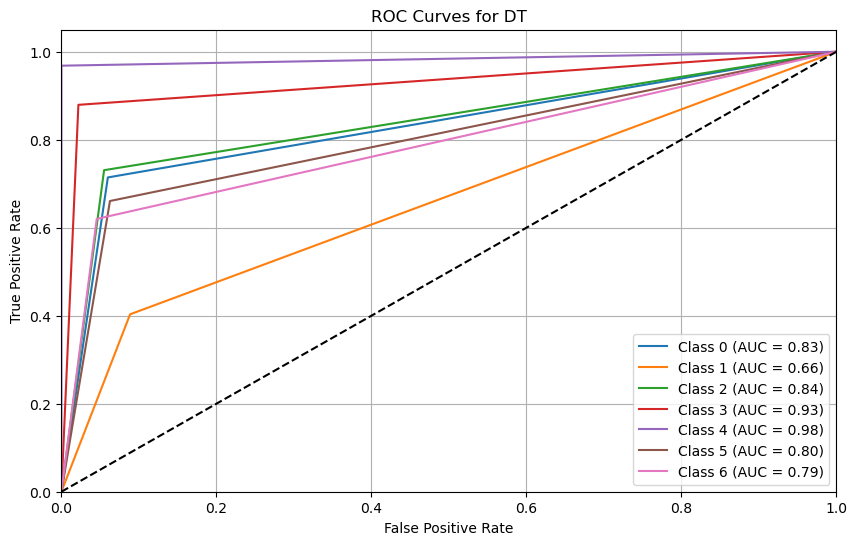

Micro Average AUC: 0.83
Macro Average AUC: 0.83


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for y_test
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_scores = dtc.predict_proba(X_test_pca)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for DT')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro Average ROC AUC
roc_auc_macro = np.mean([roc_auc_score(y_test_bin[:, i], y_scores[:, i]) for i in range(n_classes)])

print(f'Micro Average AUC: {roc_auc_micro:.2f}')
print(f'Macro Average AUC: {roc_auc_macro:.2f}')

#### XGBoost

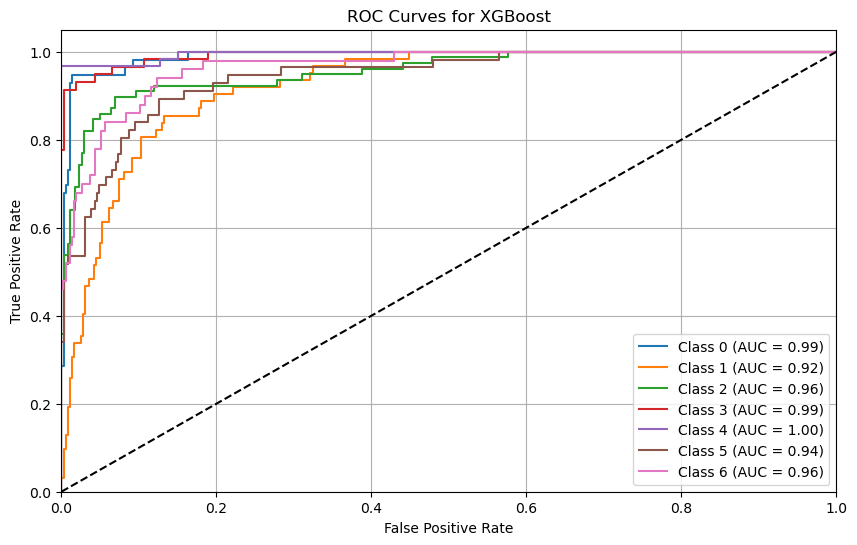

Micro Average AUC: 0.97
Macro Average AUC: 0.97


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for y_test
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_scores = xgb_model.predict_proba(X_test_pca)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro Average ROC AUC
roc_auc_macro = np.mean([roc_auc_score(y_test_bin[:, i], y_scores[:, i]) for i in range(n_classes)])

print(f'Micro Average AUC: {roc_auc_micro:.2f}')
print(f'Macro Average AUC: {roc_auc_macro:.2f}')

#### GB

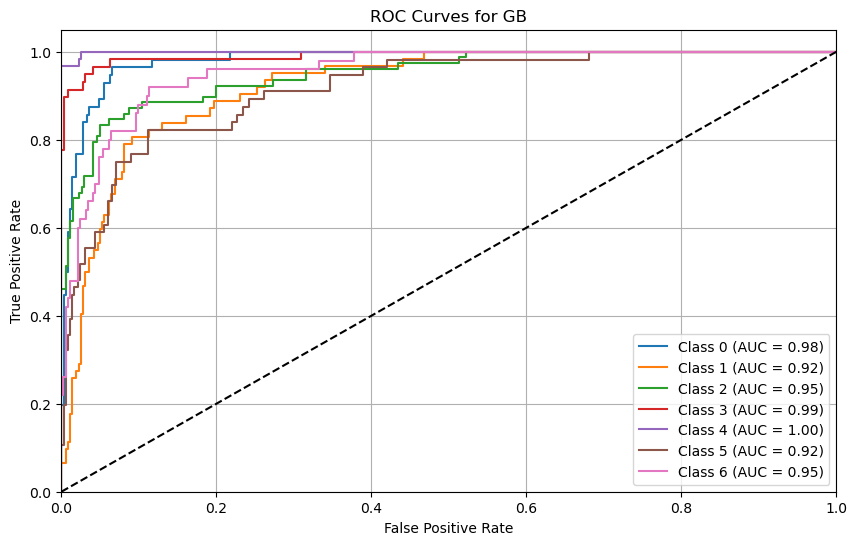

Micro Average AUC: 0.97
Macro Average AUC: 0.96


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for y_test
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_scores = gb.predict_proba(X_test_pca)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for GB')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro Average ROC AUC
roc_auc_macro = np.mean([roc_auc_score(y_test_bin[:, i], y_scores[:, i]) for i in range(n_classes)])

print(f'Micro Average AUC: {roc_auc_micro:.2f}')
print(f'Macro Average AUC: {roc_auc_macro:.2f}')

In [76]:
# importances = rfc.feature_importances_

# # Create a DataFrame to associate feature names with importance scores
# importance_df = pd.DataFrame({'Feature': pca_feature_names, 'Importance': importances})

# # Sort the DataFrame by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the sorted feature importances
# print(importance_df)


In [77]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta model
meta_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = stacking_model.predict(X_train_pca)
stc_pred = stacking_model.predict(X_test_pca)

# Evaluate the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, stc_pred))

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, stc_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       239
           4       1.00      1.00      1.00       261
           5       1.00      1.00      1.00       234
           6       1.00      1.00      1.00       240

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.65      0.65      0.65        62
           2       0.83      0.83      0.83        78
           3       0.91      0.91      0.91        58
           4       1.00      0.97      0.98        63
           5      

Stacking Report:
               precision    recall  f1-score   support

           0       0.64      0.89      0.75        56
           1       0.72      0.37      0.49        62
           2       0.76      0.68      0.72        78
           3       0.77      0.95      0.85        58
           4       1.00      1.00      1.00        63
           5       0.51      0.52      0.51        56
           6       0.54      0.56      0.55        50

    accuracy                           0.71       423
   macro avg       0.71      0.71      0.70       423
weighted avg       0.72      0.71      0.70       423



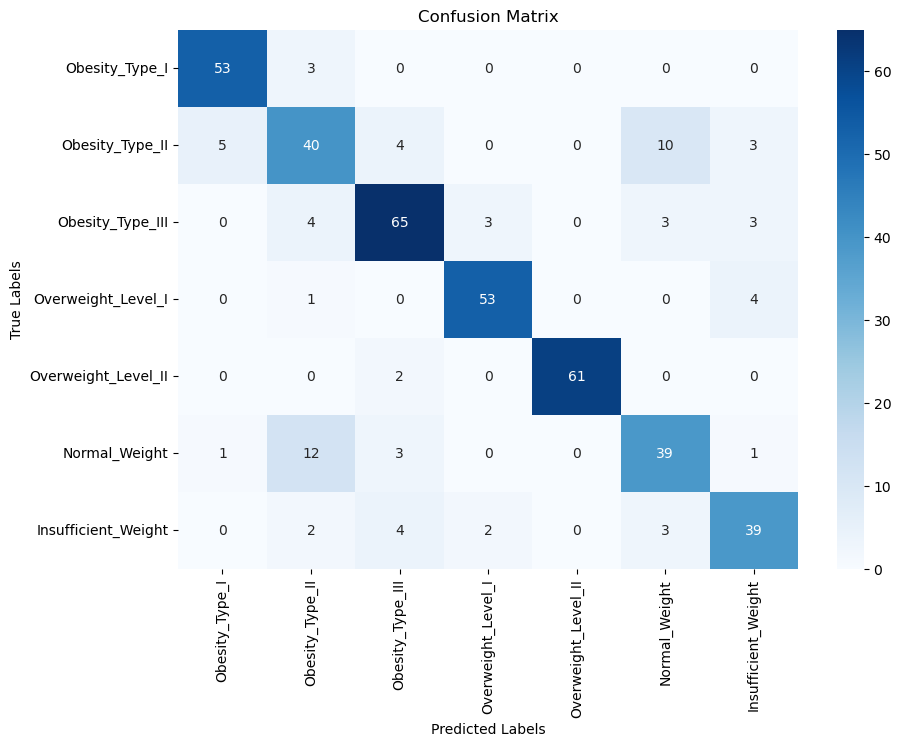

In [78]:
print("Stacking Report:\n", classification_report(y_test, lg_pred))
cm=confusion_matrix(y_test, stc_pred)
# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

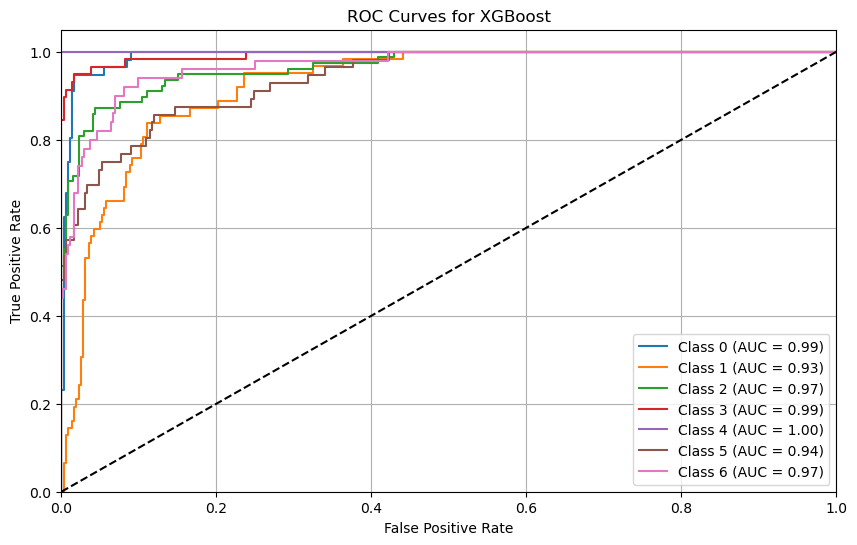

Micro Average AUC: 0.98
Macro Average AUC: 0.97


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for y_test
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_scores = stacking_model.predict_proba(X_test_pca)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro Average ROC AUC
roc_auc_macro = np.mean([roc_auc_score(y_test_bin[:, i], y_scores[:, i]) for i in range(n_classes)])

print(f'Micro Average AUC: {roc_auc_micro:.2f}')
print(f'Macro Average AUC: {roc_auc_macro:.2f}')

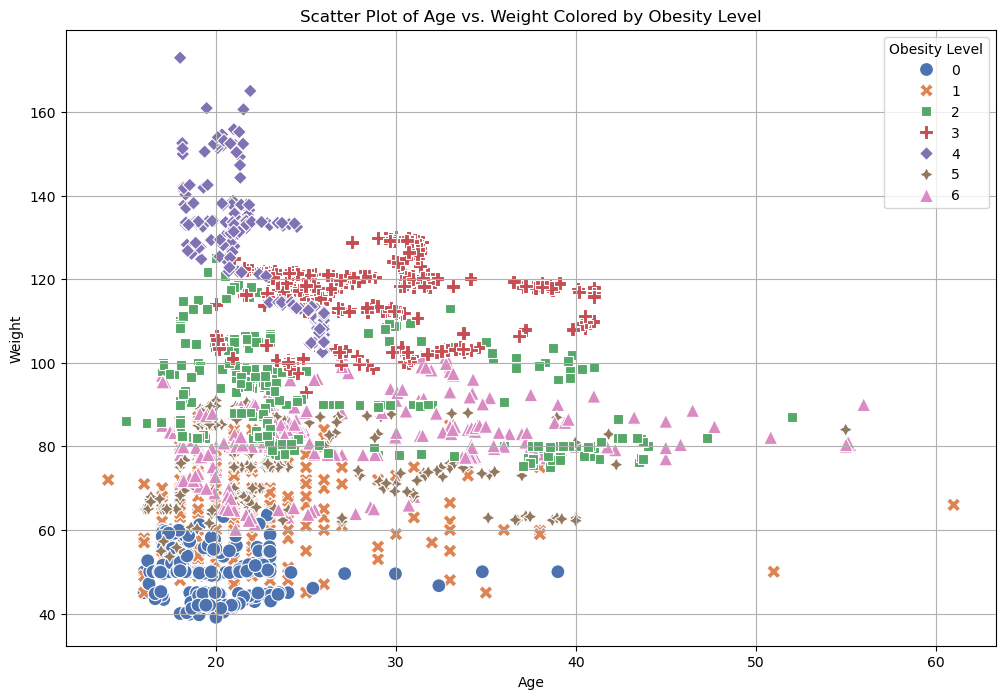

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_encoded, x='Age', y='Weight', hue='NObeyesdad', style='NObeyesdad', palette='deep', s=100)
plt.title('Scatter Plot of Age vs. Weight Colored by Obesity Level')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='Obesity Level')
plt.grid()
plt.show()

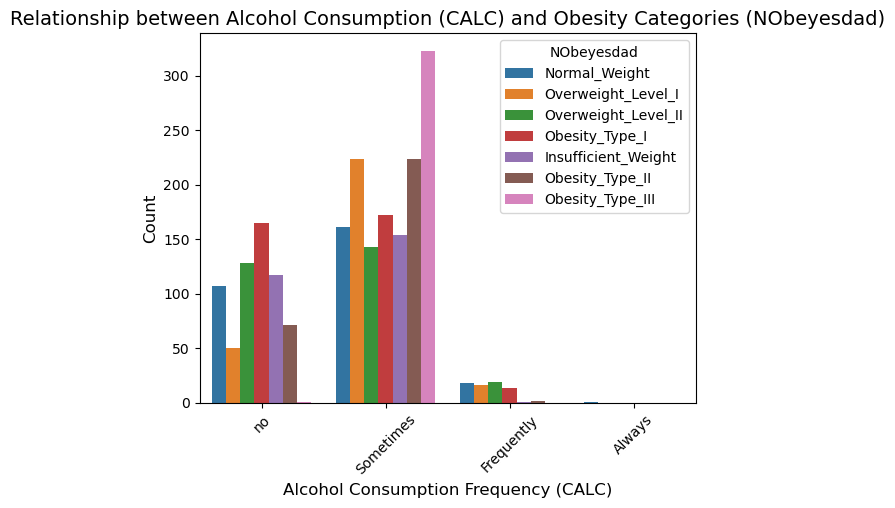

In [25]:
# Create a count plot
sns.countplot(data=df, x="CALC", hue="NObeyesdad")

# Add title and labels
plt.title("Relationship between Alcohol Consumption (CALC) and Obesity Categories (NObeyesdad)", fontsize=14)
plt.xlabel("Alcohol Consumption Frequency (CALC)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

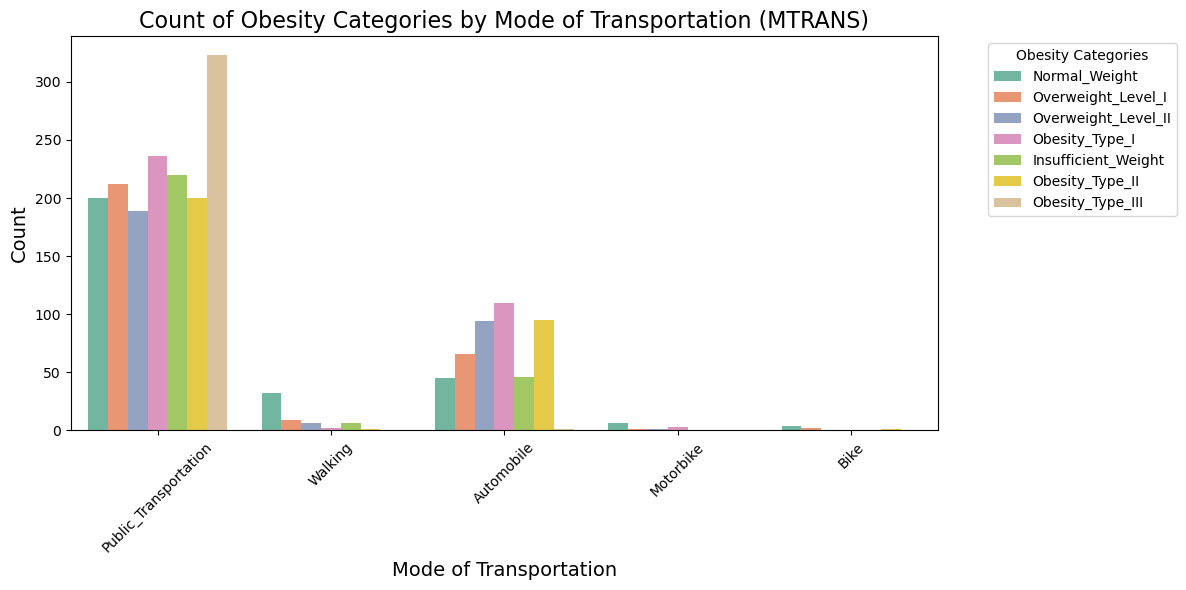

In [27]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad', palette='Set2')

# Adding labels and title
plt.title('Count of Obesity Categories by Mode of Transportation (MTRANS)', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Obesity Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### Without PCA

In [98]:
rfc.fit(X_train, y_train)
logreg.fit(X_train,y_train)
dtc.fit(X_train, y_train)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [99]:
# Make predictions
dt_pred = dtc.predict(X_test)
rf_pred = rfc.predict(X_test)
lg_pred= logreg.predict(X_test)
gb_pred=gb.predict(X_test)


Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.92      0.89      0.90        62
           2       0.96      0.96      0.96        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.89      0.91      0.90        56
           6       0.96      0.94      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



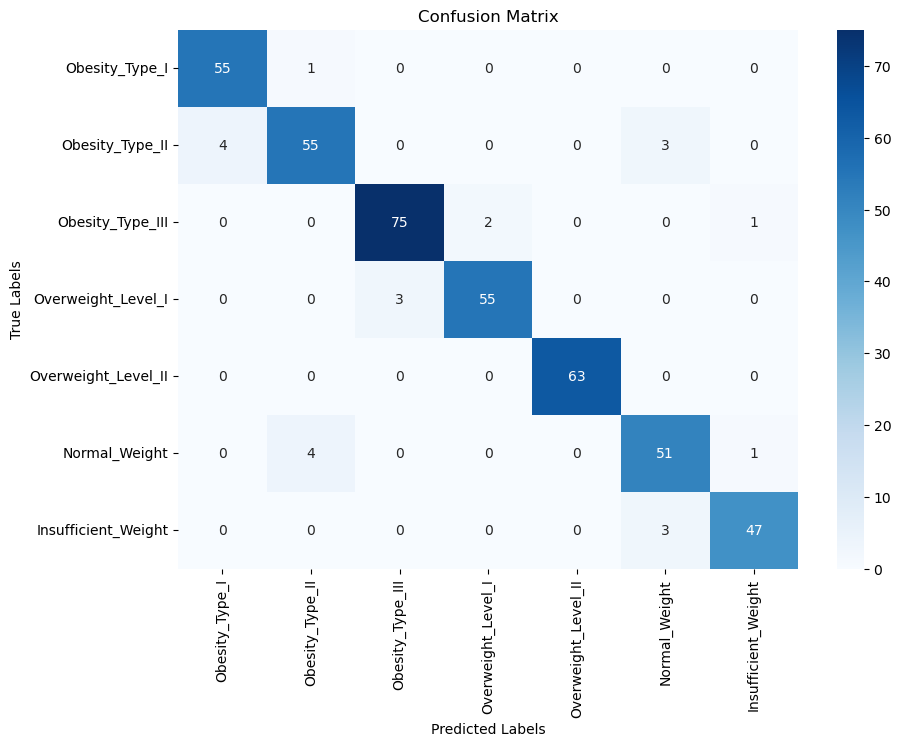

In [100]:
print("Decision Tree Classifier Report:\n", classification_report(y_test, dt_pred))
cm=confusion_matrix(y_test, dt_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.87      0.95      0.91        62
           2       0.99      0.95      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.96      0.88      0.92        56
           6       0.92      0.98      0.95        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



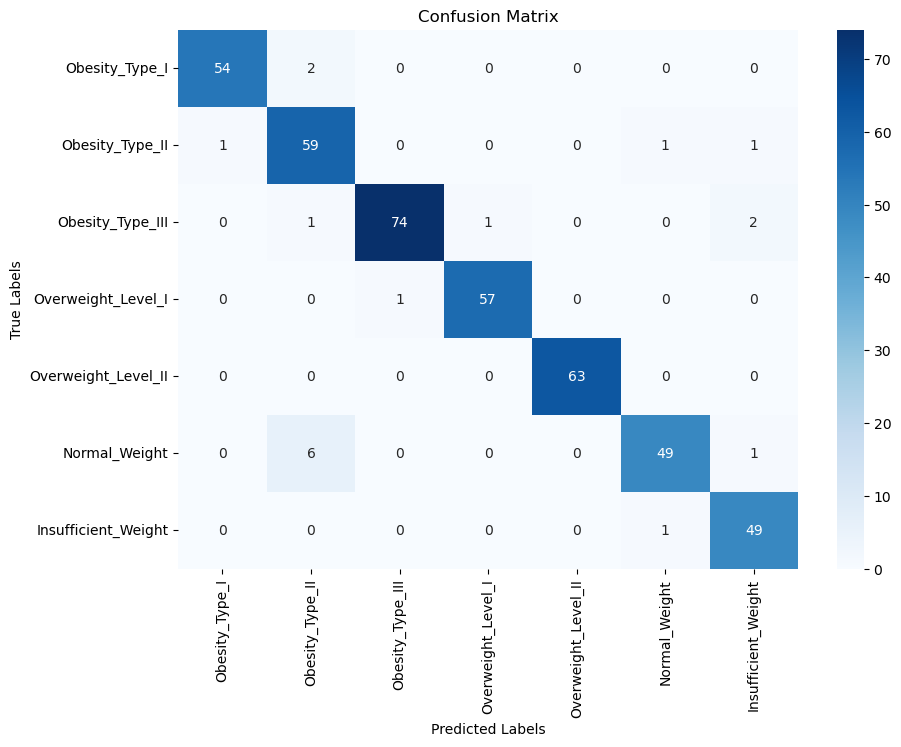

In [101]:
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_pred))
cm=confusion_matrix(y_test, rf_pred)
# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [102]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta model
meta_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stacking_model.predict(X_train)
stc_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, stc_pred))

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, stc_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       239
           4       1.00      1.00      1.00       261
           5       1.00      1.00      1.00       234
           6       1.00      1.00      1.00       240

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.84      0.89        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5      

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.91      0.85      0.88        62
           2       0.97      0.91      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.87      0.93      0.90        56
           6       0.96      0.96      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



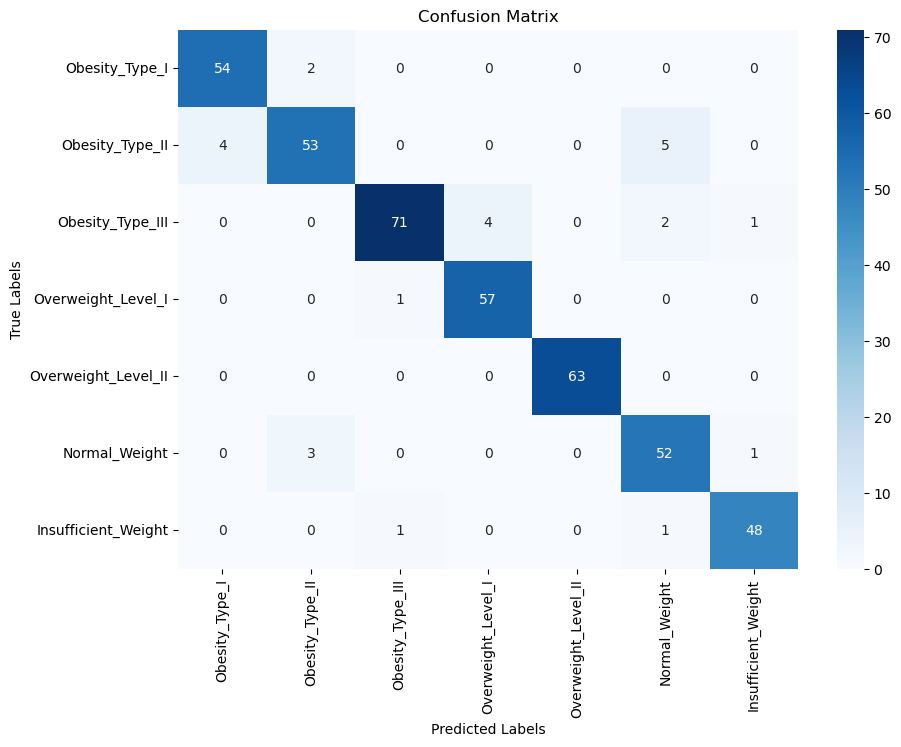

In [103]:
print("Gradient Boosting Report:\n", classification_report(y_test, gb_pred))
cm=confusion_matrix(y_test, gb_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'],
            yticklabels=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()